<a href="https://colab.research.google.com/github/preetidhyani92/coding-preeti/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✅ Dataset Loaded Successfully after Cleaning!
Dataset Shape: (1600000, 6)

Sample Data:


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64

Column Names: Index(['sentiment', 'id', 'date', 'query', 'user', 'text', 'clean_text'], dtype='object')

Missing Values:
 sentiment     0
id            0
date          0
query         0
user          0
text          0
clean_text    0
dtype: int64

Sample Data:
   sentiment          id                          date     query  \
0  Negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  Negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  Negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  Negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  Negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  \
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1    scotthamilton  is upset that he can't update his Facebook by ...   
2         mattycus  @Kenichan I dived man

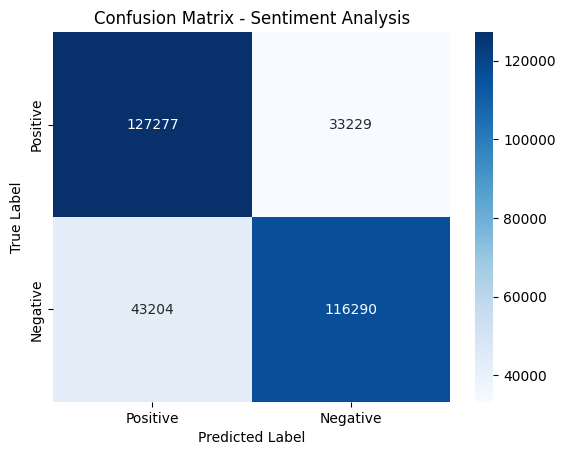

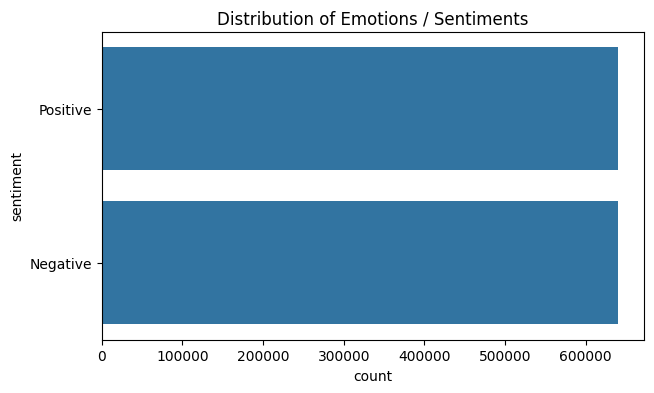


✅ Sentiment Analysis Completed Successfully!


In [15]:
# ===============================================================
# 📊 SENTIMENT ANALYSIS USING NLP (Emotions Dataset)
# Author: Preeti Dhyani
# ===============================================================

# ---------------------------------------------------------------
# 1️⃣ Import Required Libraries
# ---------------------------------------------------------------
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import csv
import logging
import sys

# Configure logging to show warnings
logging.basicConfig(level=logging.WARNING)

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# ---------------------------------------------------------------
# 2️⃣ Load and Clean Dataset
# ---------------------------------------------------------------
file_path = '/content/drive/My Drive/Emotions.csv'
cleaned_data = []

# Increase the field size limit to handle potentially large fields
csv.field_size_limit(sys.maxsize)

# Manually read and parse the CSV to handle potential errors
with open(file_path, 'r', encoding='latin-1') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        try:
            # Assuming 6 columns based on the original data structure
            if len(row) == 6:
                cleaned_data.append(row)
            else:
                logging.warning(f"Skipping row {i+1} due to unexpected number of columns: {len(row)}")
        except csv.Error as e:
            logging.warning(f"Skipping row {i+1} due to parsing error: {e}")

# Load the cleaned data into a pandas DataFrame
data = pd.DataFrame(cleaned_data)

# Assign proper column names - based on the display of head(), the columns appear to be:
# 0: sentiment, 1: id, 2: date, 3: query, 4: user, 5: text
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

print("✅ Dataset Loaded Successfully after Cleaning!")
print("Dataset Shape:", data.shape)
print("\nSample Data:")
display(data.head())

# Clean only the text column
# Define clean_text function before using it
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)          # remove links
    text = re.sub(r'[^a-zA-Z]', ' ', text)       # keep only letters
    text = text.lower()                          # lowercase
    words = nltk.word_tokenize(text)             # tokenize
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(clean_text)

# Label and features
# Map sentiment values to 'Negative' and 'Positive'
data['sentiment'] = data['sentiment'].replace({'0': 'Negative', '4': 'Positive'}) # Note: '0' and '4' are strings now

print(data['sentiment'].value_counts())


# ---------------------------------------------------------------
# 3️⃣ Explore Dataset
# ---------------------------------------------------------------
print("\nColumn Names:", data.columns)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSample Data:\n", data.head())

# ---------------------------------------------------------------
# 4️⃣ Data Preprocessing (Cleaning Text)
# ---------------------------------------------------------------
print("\n✅ Text Cleaning Completed")

# ---------------------------------------------------------------
# 5️⃣ Encode Target Variable (Sentiment)
# ---------------------------------------------------------------
# Now that we have assigned column names, we can directly access the sentiment column
if 'sentiment' in data.columns:
    y = data['sentiment']
else:
    raise Exception("⚠️ Please make sure your dataset has a 'sentiment' column!")

print("Unique Sentiment Labels:", y.unique())


# ===============================================================
# 6️⃣ TF-IDF Vectorization + Model Training
# ===============================================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train_text, X_test_text, y_train, y_test = train_test_split(
    data['clean_text'], data['sentiment'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

print("✅ TF-IDF Completed")
print("Training Shape:", X_train_tfidf.shape, "Testing Shape:", X_test_tfidf.shape)

# Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("\n📊 Model Performance")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix - Sentiment Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---------------------------------------------------------------
# 🔟 Insights & Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(7,4))
# Use y_train to plot the distribution of sentiments in the training data
sns.countplot(y=y_train)
plt.title("Distribution of Emotions / Sentiments")
plt.show()

print("\n✅ Sentiment Analysis Completed Successfully!")

In [12]:
import os

# Check if the Emotions.csv file exists in the specified path
file_path = '/content/drive/My Drive/Emotions.csv'
if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist.")
    print("Please make sure the file is in your Google Drive and the path is correct.")

The file '/content/drive/My Drive/Emotions.csv' exists.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
